#Importación de librerías

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.misc import derivative
import sympy as sp

#Derivadas



1.   Realizar un gráfico del kernel de Lucy.
2.   Encontrar la derivada empleanda la libreria simbolica
3.   Realizar un grafico de los cálculos encontrados con la libreria simbólica
4.   comparar con la derivada numérica de los datos del punto 1.


##Definición de funciones

In [ ]:
def lucy_2d (r0, rp, h=0.1):
  """
  La función lucy_2d calcula el valor del Kernel cuartico
  de lucy para el caso de 2 dimensiones donde:

  r0 = posición de particula fija
  rp = posición de la particula vecina
  r = distancia entre r0 y rp

  alpha_2d = Constante de normalización
  h = radio de soporte
  """

  alpha_2d = 5/(np.pi*(h**2))
  r = np.linalg.norm(rp-r0)
  q = r/h
  W = lambda alpha, q, r: alpha*(1+3*q)*(1-q)**3 if ((0 <= r) and (r <= h)) else 0
  
  return W(alpha_2d,q,r)

La ecuación fue tomada de:

C. A. D. Fraga Filho, D. F. Pezzin  & J. T. A. Chacaltana1. (2014). A numerical study of heat diffusion using the Lagrangian particle  SPH method and the Eulerian Finite-Volume method:  analysis of convergence, consistency  and computational cost. WIT  Transactions  on  Engineering  Sciences,  Vol  83 p(18). DOI: 10.2495/HT140021

##Prueba de escritorio de la función

In [ ]:
a = np.asarray([0,0])
b = np.asarray([0.1,0.3])
h = 1

lucy_2d(a,b,h)

##Comportamiento gráfico de la función


Test con 2500 puntos de prueba


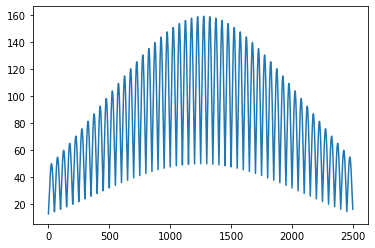

In [ ]:
ran = []

for i in np.arange(-0.05,0.05,0.002):
  for j in np.arange(-0.05,0.05,0.002):
    ran.append([i,j])
ran = np.asarray(ran)

lucys = np.asarray([lucy_2d(a, ran[i]) for i in range(len(ran))])

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(lucys)
print(f"Test con {len(ran)} puntos de prueba")

###Limite central para determinar el comportamiento de la función

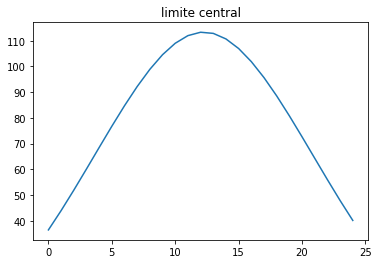

In [ ]:
new_lucy = [np.mean(i) for i in np.array_split(lucys, 25)]

fig2 = plt.figure()
dx = fig2.add_subplot(1,1,1)
plt.title('limite central')
dx.plot(new_lucy)

Se observa un comportamiento gaussiano

###Graficando en función de r

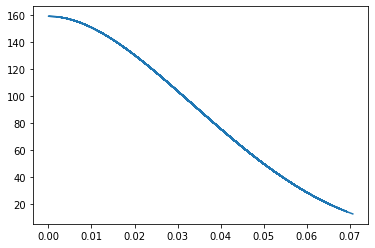

In [ ]:
fig_r = plt.figure()
ar = fig_r.add_subplot(111)

ar.plot([np.linalg.norm(i) for i in ran],lucys)

Es posible notar que se obtiene media grafica de lo que correspondería a una distribución normal

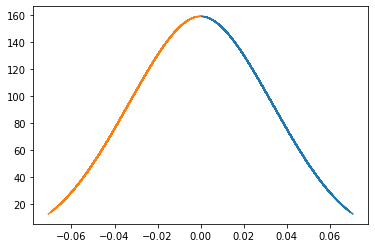

In [ ]:
fig_r = plt.figure()
ar = fig_r.add_subplot(111)

ar.plot([np.linalg.norm(i) for i in ran],lucys)
ar.plot([-np.linalg.norm(i) for i in ran],lucys)

Lo anterior se verifica graficamente tomando los mismos r con signo negativo

###Visualización 3D 

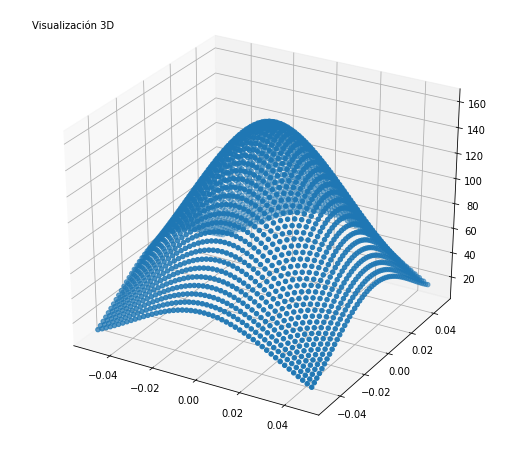

In [ ]:
fig3d = plt.figure(figsize=(9,8))

cx = fig3d.add_subplot(projection='3d')
cx.text2D(0.05, 0.95, "Visualización 3D", transform=cx.transAxes)
cx.scatter([i[0] for i in ran], [i[1] for i in ran], lucys)

##Derivada simbolica

La derivada simbolica de la expresión es:



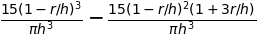

In [ ]:
sp.init_printing(use_unicode=True)
r, h = sp.symbols('r h')

def fh(r,h):
  return (5/(sp.pi*(h**2)))*(1+(3*r)/h)*((1-(r/h))**3)  

print(f'La derivada simbolica de la expresión es:\n')
sp.diff(fh(r,h), r)

##Grafica de la derivada en función de r

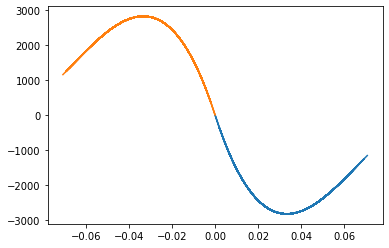

In [ ]:
diff_lucy= sp.lambdify((r,h), sp.diff(fh(r,h), r), 'numpy')
derr = np.asarray([diff_lucy(np.linalg.norm(ran[i]), 0.1) for i in range(len(ran))])

fig3 = plt.figure()
ex = fig3.add_subplot(1,1,1)

ex.plot([np.linalg.norm(i) for i in ran], derr)
ex.plot([-np.linalg.norm(i) for i in ran], -derr) #Cola negativa de la funcíon


###Función vs Derivada

[False False False ... False False False]


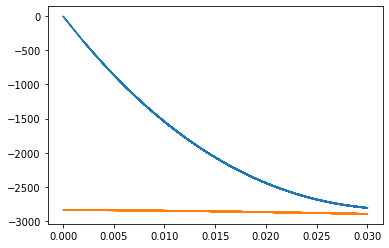

In [ ]:
diff_lucy= sp.lambdify((r,h), sp.diff(fh(r,h), r), 'numpy')
derr = np.asarray([diff_lucy(np.linalg.norm(ran[i]), 0.1) for i in range(len(ran))])

fig3 = plt.figure()
ex = fig3.add_subplot(1,1,1)

mask = np.asarray([np.linalg.norm(i) <= 0.03 for i in ran])

ex.plot([np.linalg.norm(i) for i in ran[mask]], derr[mask])
ex.plot([np.linalg.norm(i) for i in ran[mask]], lucys[mask] -3000)

###Grafica 3D de la derivada

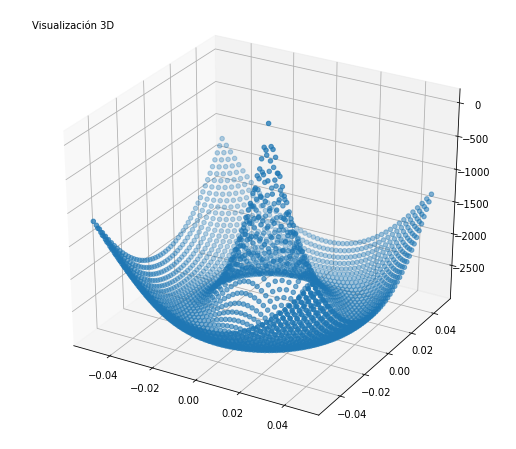

In [ ]:
fig3d_der = plt.figure(figsize=(9,8))

derx = fig3d_der.add_subplot(projection='3d')
derx.text2D(0.05, 0.95, "Visualización 3D", transform=derx.transAxes)
derx.scatter([i[0] for i in ran], [i[1] for i in ran], derr)

#Integrales

In [9]:
from scipy import integrate

##Método del trapecio


Aplicando la ecuación:

$$T_N(f) = \frac{\Delta x}{2} \sum_{i=1}^N (f(x_i) + f(x_{i-1}))$$

Es posible aproximar la integral por el método del trapecio

##Función 1:

$$e^{1-\sqrt{x}}$$

In [10]:
f1 = lambda x: np.exp(1-x**0.5)

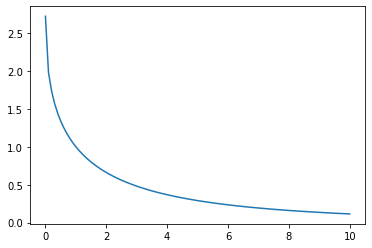

In [11]:
dom = np.linspace(0,10,100)
plt.plot(dom, f1(dom))

In [12]:
dom3 = np.linspace(1E-10,np.pi,100)
print(f'La integral de la función exponencial es {integrate.trapz(f1(dom3)):.2f}')

La integral de la función exponencial es 90.71


##Metodo de Simpson

Aplicando la ecuación:

$$S_N(f) = \frac{\Delta x}{3} \sum_{i=1}^{N/2} \left( f(x_{2i-2}) + 4 f(x_{2i-1}) + f(x_{2i}) \right)$$

Es posible aproximar la integral.

##funcion 
$$\int_{-\infty}^{\infty} \frac{1}{1+x^2} \ dx$$

In [1]:
f2 = lambda x: 1/(1+x*2)

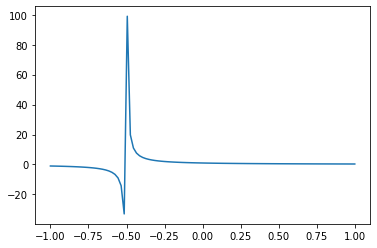

In [19]:
dom4 = np.linspace(-1,1,100)
plt.plot(dom4,f2(dom4))

##integral

In [23]:
print(f'La integral de la función racional es {integrate.simps(f2(dom4)):.2f}')

La integral de la función racional es 104.94


#Metodo de la cuadratura

##Función a calcular
$$\int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\, dx$$

In [20]:
f3 = lambda x: 1/np.sqrt(np.tan(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


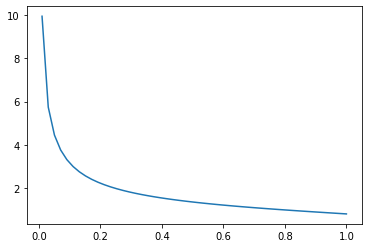

In [21]:
dom5 = np.linspace(-1,1,100)
plt.plot(dom5, f3(dom5))

#integral

In [26]:
print(f'La integral de la funcion dada es {integrate.quad(f3, 0, np.pi/2)[0]:.2f}')

La integral de la funcion dada es 2.22


#Escape velocity

$$v^2=2gR\int_1 ^\infty z^{-2} dz,$$

Dado que 
$z = \frac{x}{R}$ entonces la ecuacion queda de la forma

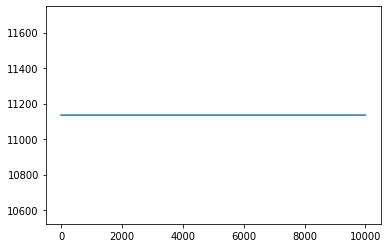

In [59]:
def v(x):
  
  I = integrate.quad(lambda x: 1/x**2, 1, np.infty)[0]
  return np.sqrt(2*9.72*((6378*1000))*I)

#
v = np.vectorize(v)
plt.plot(np.linspace(0,10000,12000), v(np.linspace(0,10000,12000)))

In [62]:
print(f'La velocidad de escape es de aproximandamente {v(1)/1000:.2f} m/s, lo cual se aproxima a la información en linea')
print(f'Se observa que el valor es una constante')

La velocidad de escape es de aproximandamente 11.14 m/s, lo cual se aproxima a la información en linea


In [54]:
v(np.linspace(0,10000,12000))

71019057207.44876